# Linear Transformations in PyTorch

In PyTorch, 

```python
torch.nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)
```

applies an "affine" transformation to the incoming data: 

PyTorch uses row vectors: $\mathbf{y} = \mathbf{x}\mathbf{W}^T + \mathbf{b}$ where $\mathbf{W} \in \mathbb{R}^{out\_features \ \times \ in\_features}$ is a **weight** matrix and $\mathbf{b} \in \mathbb{R}^{1 \ \times \ out\_features}$ is a **bias** vector.

We use column vectors: $\mathbf{y} = \mathbf{W}\mathbf{x} + \mathbf{b}$ where $\mathbf{W} \in \mathbb{R}^{out\_features \ \times \ in\_features}$ is a **weight** matrix and $\mathbf{b} \in \mathbb{R}^{out\_features \ \times \ 1}$ is a **bias** vector.

Note that there is **no bias term in linear transformation!**

In [1]:
import torch
import torch.nn as nn

# lets create a linear map from 2D to 2D
linear_tr = nn.Linear(2,2,bias=False) # we want to a linear map, so set bias to false

## What is inside the weight matrix?

In [2]:
#lets see what is inside weight and bias
print(linear_tr.weight)
print(linear_tr.bias) # no bias, this should print None

Parameter containing:
tensor([[ 0.0431, -0.2517],
        [-0.2432, -0.2057]], requires_grad=True)
None


## Initializing weight matrix

```linear_tr.weight``` has two parameters:

* data (Tensor) – parameter tensor.
* requires_grad (bool, optional) – if the parameter requires gradient.

In [3]:
linear_tr.weight.data = torch.tensor([[1,0],[0,1]])
linear_tr.weight.requires_grad = False
print(linear_tr.weight)

Parameter containing:
tensor([[1, 0],
        [0, 1]])


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot data
def plot_data(ax,data,marker_color):
    
    ax.scatter(data[:,0],data[:,1],s=50,c=marker_color,edgecolors='black')
        
    # arrange the figure
#     ax.set_xlim(-r_list[-1]-0.2,r_list[-1]+0.2)
#     ax.set_ylim(-r_list[-1]-0.2,r_list[-1]+0.2)
    ax.set_axisbelow(True)
    ax.grid(color='gray', linestyle='dashed')
#     ax.set_aspect('equal')

torch.Size([37, 2])
torch.FloatTensor


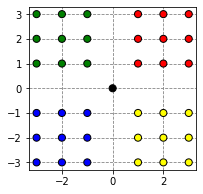

In [5]:
# create data

x_list = []
y_list = []
marker_color = []

# origin
x_list.append(torch.tensor([0]))
y_list.append(torch.tensor([0]))
marker_color.append('black')

# 1st quadrant
grid_x, grid_y = torch.meshgrid(torch.tensor([1, 2, 3]), torch.tensor([1, 2, 3]), indexing='ij')
x_list.append(torch.flatten(grid_x))
y_list.append(torch.flatten(grid_y))
marker_color += ['red']*9

# 2nd quadrant
grid_x, grid_y = torch.meshgrid(torch.tensor([-1, -2, -3]), torch.tensor([1, 2, 3]), indexing='ij')
x_list.append(torch.flatten(grid_x))
y_list.append(torch.flatten(grid_y))
marker_color += ['green']*9

# 3rd quadrant
grid_x, grid_y = torch.meshgrid(torch.tensor([-1, -2, -3]), torch.tensor([-1, -2, -3]), indexing='ij')
x_list.append(torch.flatten(grid_x))
y_list.append(torch.flatten(grid_y))
marker_color += ['blue']*9

# 4th quadrant
grid_x, grid_y = torch.meshgrid(torch.tensor([1, 2, 3]), torch.tensor([-1, -2, -3]), indexing='ij')
x_list.append(torch.flatten(grid_x))
y_list.append(torch.flatten(grid_y))
marker_color += ['yellow']*9

# consolidate data
x_tensor = torch.cat(x_list)
y_tensor = torch.cat(y_list)
data_tensor = torch.stack([x_tensor,y_tensor],axis=1)
data_tensor = data_tensor.to(torch.float)
print(data_tensor.shape)
print(data_tensor.type())


# plot the data
fig,ax = plt.subplots(figsize=(3,3))
plot_data(ax,data_tensor,marker_color)

## Identity mapping in 2D

$\mathbf{W} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

torch.Size([37, 2])


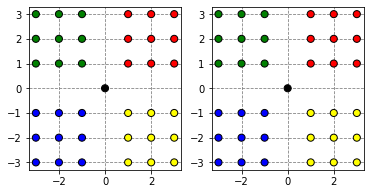

In [6]:
# transformation matrix
W = torch.tensor([[1,0],[0,1]],dtype=torch.float)

# assign to linear_tr
linear_tr.weight.data = W

# apply transformation
transformed_data_tensor = linear_tr(data_tensor)
print(transformed_data_tensor.shape)

# plot the original data and transformed data and 
fig,ax = plt.subplots(1,2,figsize=(6,3))
plot_data(ax[0],data_tensor,marker_color)
plot_data(ax[1],transformed_data_tensor,marker_color)


## Rotation in 2D

$\mathbf{W} = \begin{bmatrix} cos\alpha & -sin\alpha \\ sin\alpha & cos\alpha \end{bmatrix}$

torch.Size([37, 2])


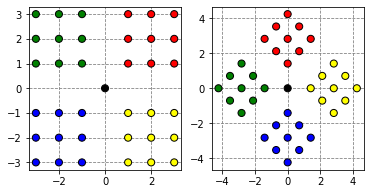

In [7]:
import math

# transformation matrix
alpha = math.pi/4
W = torch.tensor([[math.cos(alpha),-math.sin(alpha)],[math.sin(alpha),math.cos(alpha)]])

# assign to linear_tr
linear_tr.weight.data = W

# apply transformation
transformed_data_tensor = linear_tr(data_tensor)
print(transformed_data_tensor.shape)

# plot the original data and transformed data and 
fig,ax = plt.subplots(1,2,figsize=(6,3))
plot_data(ax[0],data_tensor,marker_color)
plot_data(ax[1],transformed_data_tensor,marker_color)

## Arbitrary mappings in 2D

tensor([[0.3272, 0.0792],
        [0.2668, 0.5825]])
torch.Size([37, 2])


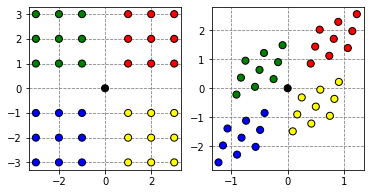

In [8]:
# transformation matrix
# W = torch.tensor([[2,0],[0,2]],dtype=torch.float)
# W = torch.tensor([[1,1],[0,1]],dtype=torch.float)
# W = torch.tensor([[-1,0],[0,-1]],dtype=torch.float)
# W = torch.tensor([[0.5,0],[0,0.5]],dtype=torch.float)
# W = torch.tensor([[1,-1],[1,-1]],dtype=torch.float)
# W = torch.tensor([[0,0],[0,0]],dtype=torch.float)
W = torch.rand(2, 2, dtype=torch.float)
print(W)

# assign to linear_tr
linear_tr.weight.data = W

# apply transformation
transformed_data_tensor = linear_tr(data_tensor)
print(transformed_data_tensor.shape)

# plot the original data and transformed data and 
fig,ax = plt.subplots(1,2,figsize=(6,3))
plot_data(ax[0],data_tensor,marker_color)
plot_data(ax[1],transformed_data_tensor,marker_color)

## Affine mappings in 2D

In [9]:
# lets create an affine map from 2D to 2D
affine_tr = nn.Linear(2,2,bias=True)
print(affine_tr.weight)
print(affine_tr.bias)

affine_tr.weight.requires_grad = False
affine_tr.bias.requires_grad = False
print(affine_tr.weight)
print(affine_tr.bias)

Parameter containing:
tensor([[ 0.1479,  0.5341],
        [ 0.2241, -0.4422]], requires_grad=True)
Parameter containing:
tensor([-0.2812, -0.1150], requires_grad=True)
Parameter containing:
tensor([[ 0.1479,  0.5341],
        [ 0.2241, -0.4422]])
Parameter containing:
tensor([-0.2812, -0.1150])


tensor([[0.6270, 0.2732],
        [0.1122, 0.8477]])
tensor([0.6017, 0.4412])
torch.Size([37, 2])


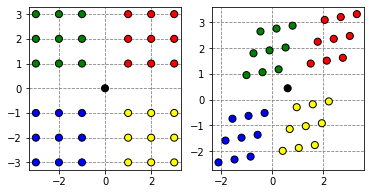

In [10]:
# weight matrix
# W = torch.tensor([[1,0],[0,1]],dtype=torch.float)
W = torch.rand(2, 2, dtype=torch.float)
print(W)

# bias matrix
# b = torch.tensor([1,1],dtype=torch.float)
b = torch.rand(2, dtype=torch.float)
print(b)

# assign to affine_tr
affine_tr.weight.data = W
affine_tr.bias.data = b

# apply transformation
transformed_data_tensor = affine_tr(data_tensor)
print(transformed_data_tensor.shape)

# plot the original data and transformed data and 
fig,ax = plt.subplots(1,2,figsize=(6,3))
plot_data(ax[0],data_tensor,marker_color)
plot_data(ax[1],transformed_data_tensor,marker_color)